# Micro-Credit Defaulter Model

# Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter

In [1]:
# import necessary liabries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\yjjai\Downloads\Micro-Credit-Project--1-\Micro Credit Project\Data file.csv")

In [4]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
#Lets check the shape of dataset
df.shape

(209593, 37)

so here we have 209593 row and 37 column 

# Data is Duplicated ?

In [6]:
df.duplicated().sum()

0

so here we have 0 duplicate value

In [7]:
#Lets check the data type of dataset
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_


so here we have

int64 type - amnt_loans90,  cnt_da_rech90, fr_da_rech90, cnt_loans30, label , last_rech_amt_ma , nt_ma_rech30, cnt_ma_rech90,sumamnt_ma_rech90, fr_ma_rech90

object type - pcircle, pdate , msisdn

float64 type - then All columns are float type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [9]:
# check Null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

so here No Null values are present

In [10]:
# Drop unwanted column
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['msisdn'],axis=1)

In [11]:
#Making the new column Day, Month and year from pdate column
df['Day']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['Month']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['Year']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [12]:
# Drop unwanted column
df = df.drop(['pdate'],axis=1)

In [13]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


In [14]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month,Year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


# DATA CLEANING

In [15]:
for col in df:
    print(col , "\n" , df[col].unique() , "\n")

label 
 [0 1] 

aon 
 [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05] 

daily_decr30 
 [ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ] 

daily_decr90 
 [ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ] 

rental30 
 [ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92] 

rental90 
 [ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58] 

last_rech_date_ma 
 [2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05] 

last_rech_date_da 
 [0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05] 

last_rech_amt_ma 
 [ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  1933 17391 11927  6960 21739  1554
 11327  4940 12500   790  5214 32000 1190

In [16]:
categorical_columns = ['label','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','pcircle']

In [17]:
l = list(df.columns)
continous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continous_columns.append(i)

In [18]:
print(continous_columns)

['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90', 'Day', 'Month', 'Year']


# EXPLORATORY DATA ANALYSIS (EDA)

In [19]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [20]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 1
Number of Continuous features: 36


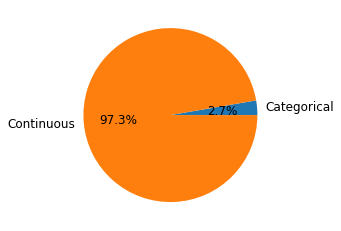

In [21]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

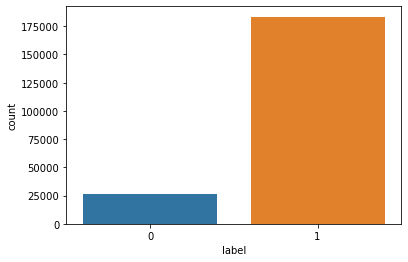

In [22]:
sns.countplot(df['label'])
plt.show()

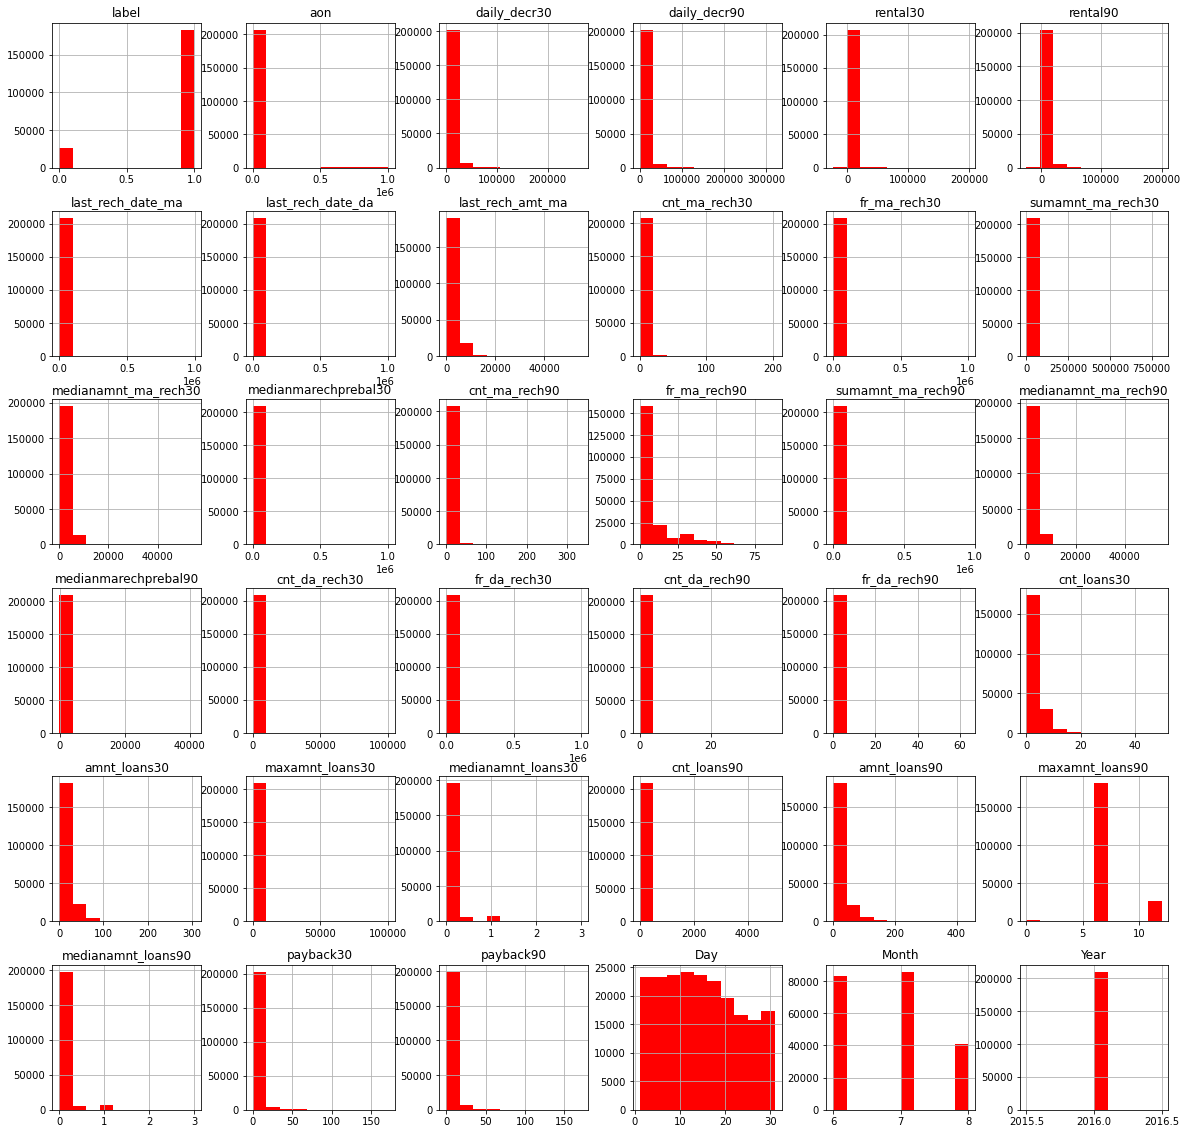

In [23]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

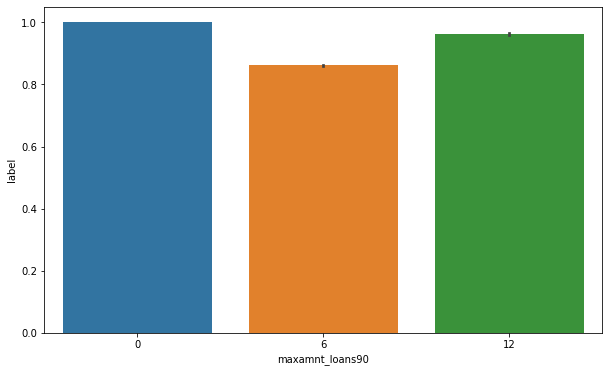

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="maxamnt_loans90",y="label",data=df)
plt.show()

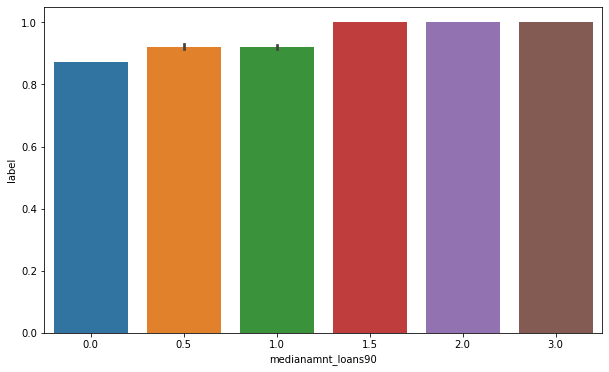

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x="medianamnt_loans90",y="label",data=df)
plt.show()

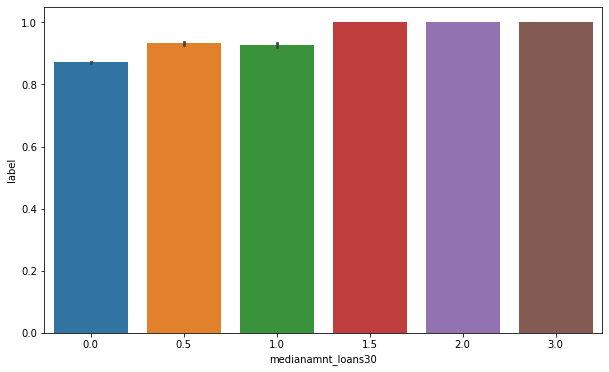

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="medianamnt_loans30",y="label",data=df)
plt.show()

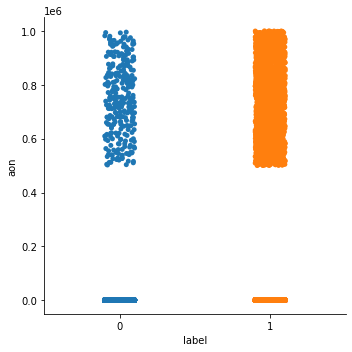

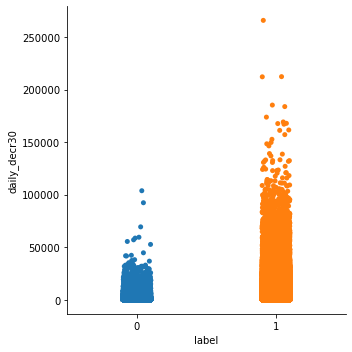

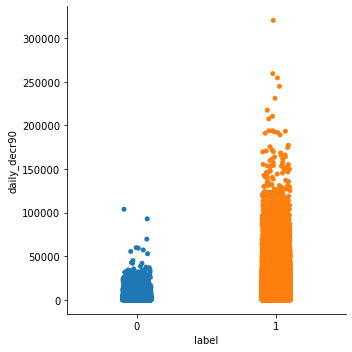

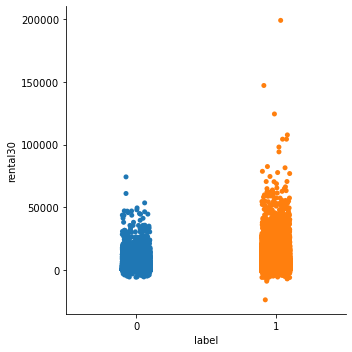

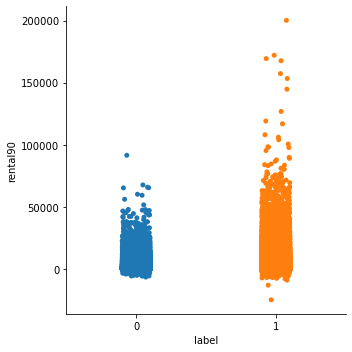

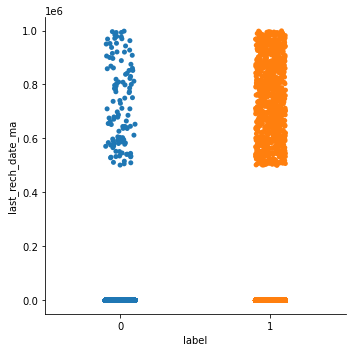

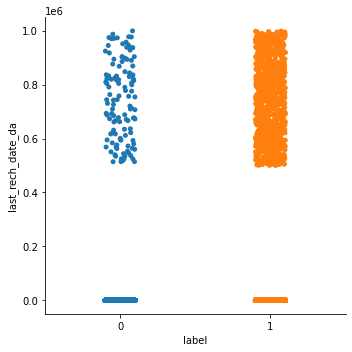

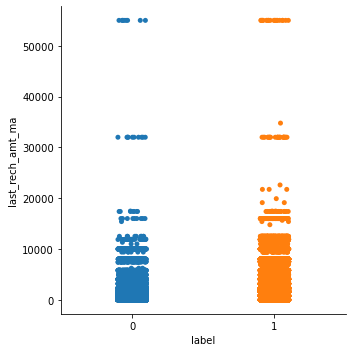

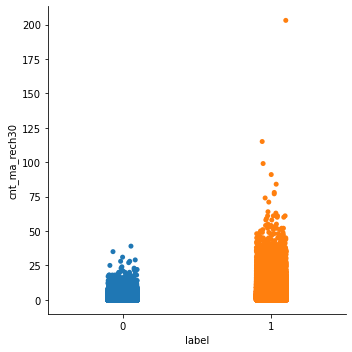

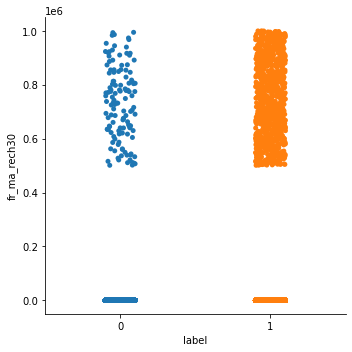

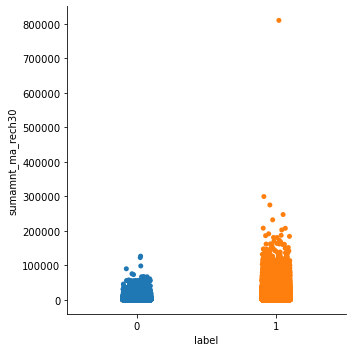

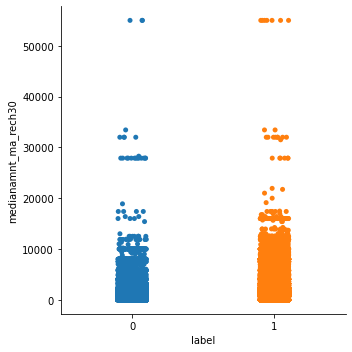

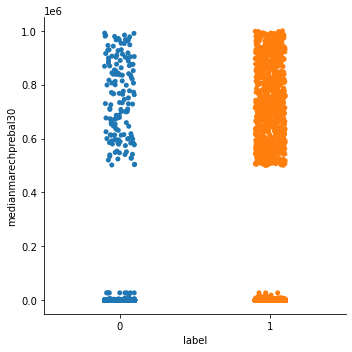

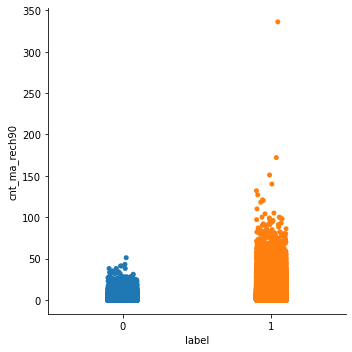

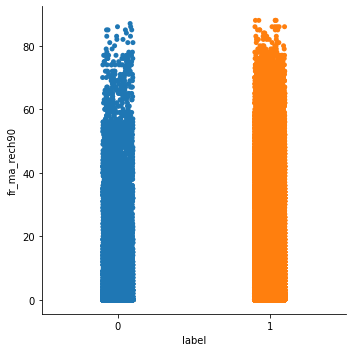

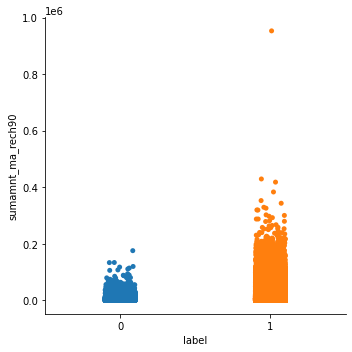

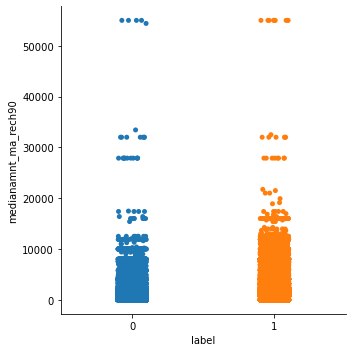

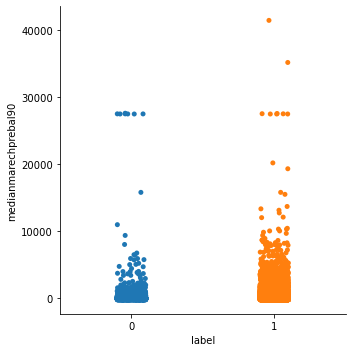

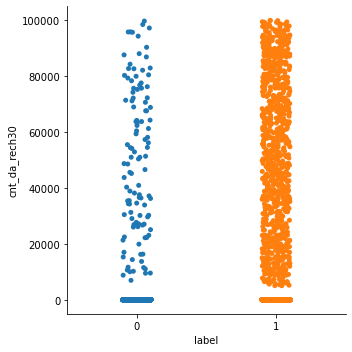

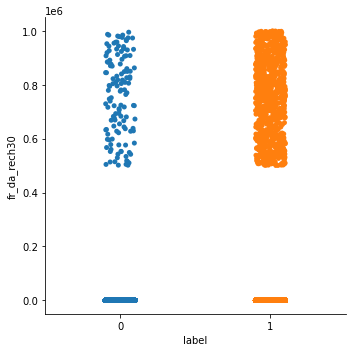

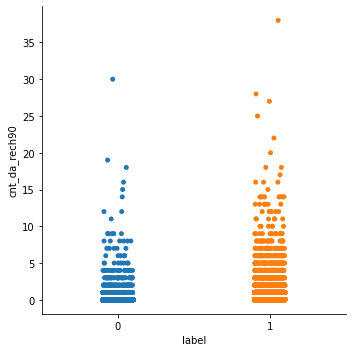

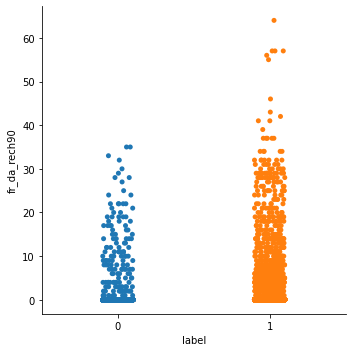

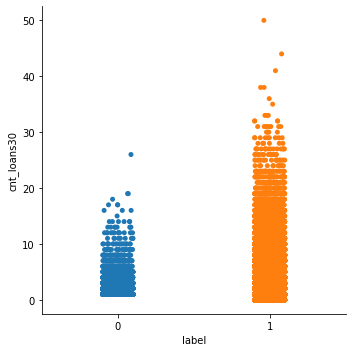

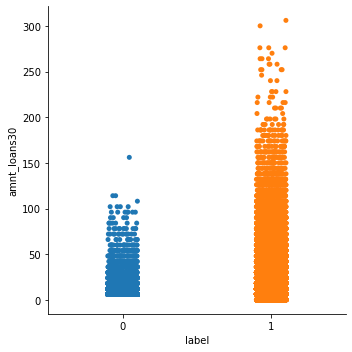

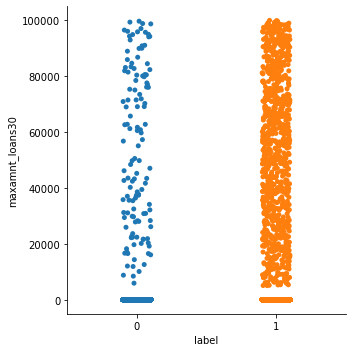

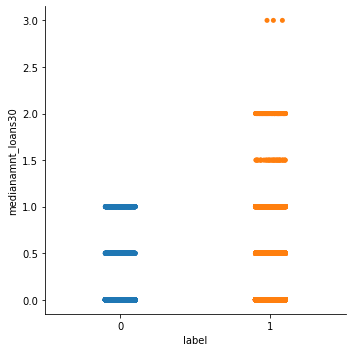

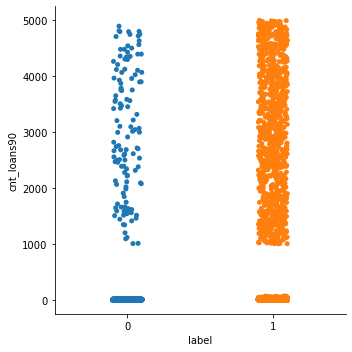

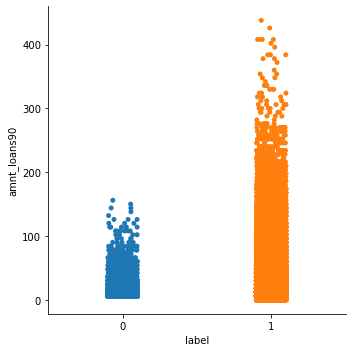

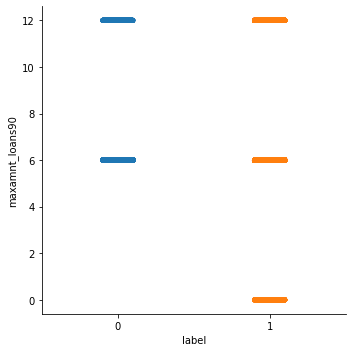

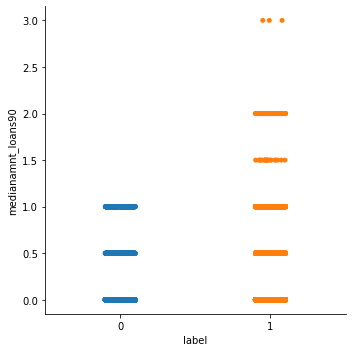

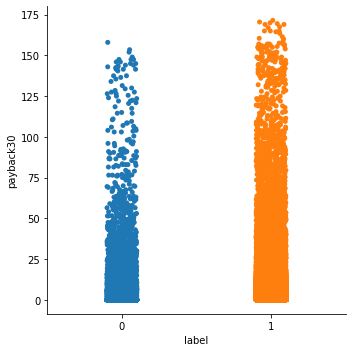

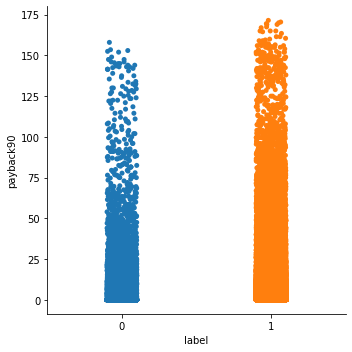

In [27]:
list=['aon',
'daily_decr30',
'daily_decr90',
'rental30',
'rental90',
'last_rech_date_ma',
'last_rech_date_da',
'last_rech_amt_ma',
'cnt_ma_rech30',
'fr_ma_rech30',
'sumamnt_ma_rech30',
'medianamnt_ma_rech30',
'medianmarechprebal30',
'cnt_ma_rech90',
'fr_ma_rech90',
'sumamnt_ma_rech90',
'medianamnt_ma_rech90',
'medianmarechprebal90',    
'cnt_da_rech30',           
'fr_da_rech30',            
'cnt_da_rech90',
'fr_da_rech90',  
'cnt_loans30',             
'amnt_loans30',            
'maxamnt_loans30',         
'medianamnt_loans30',      
'cnt_loans90',             
'amnt_loans90',            
'maxamnt_loans90',         
'medianamnt_loans90',      
'payback30',               
'payback90']

for i in list:
    sns.catplot(x='label',y=i,data=df)
    plt.show()


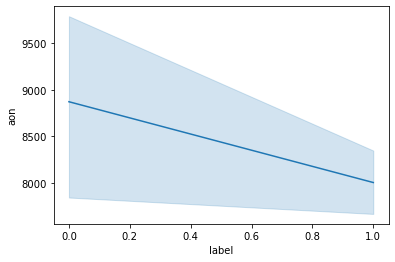

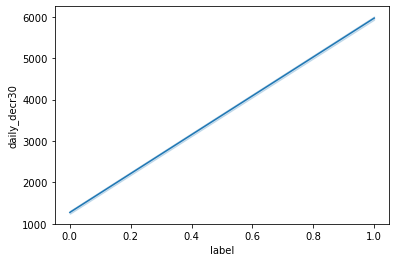

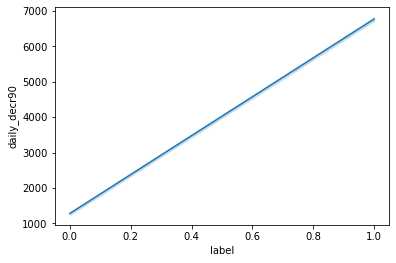

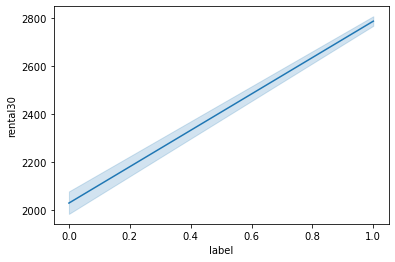

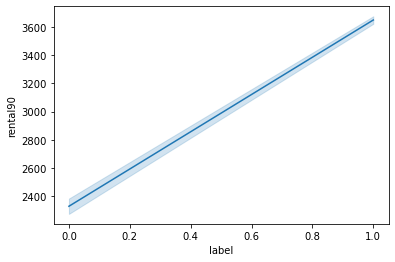

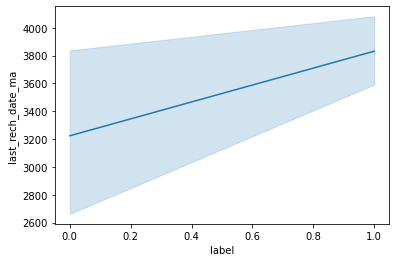

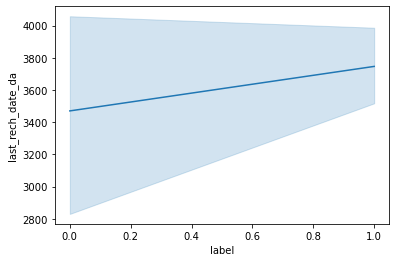

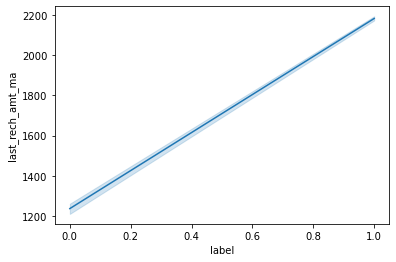

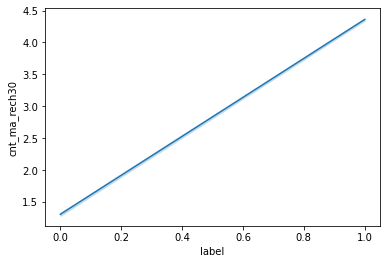

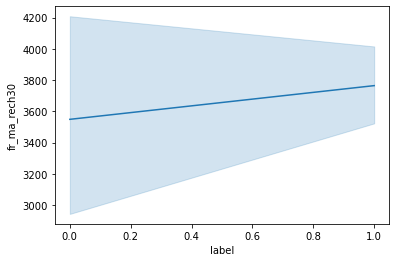

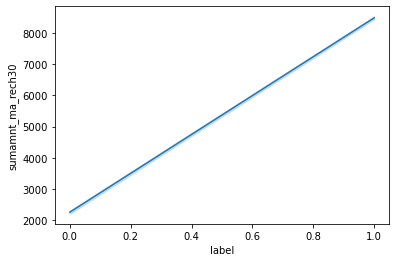

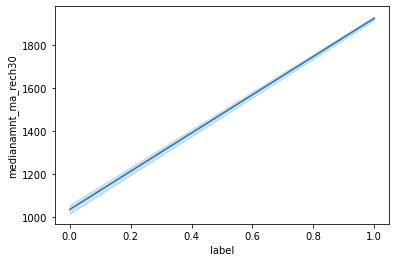

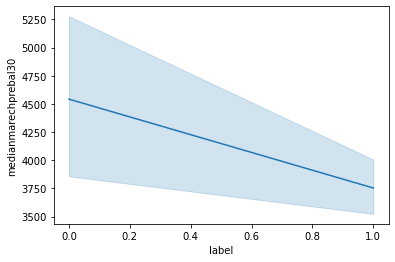

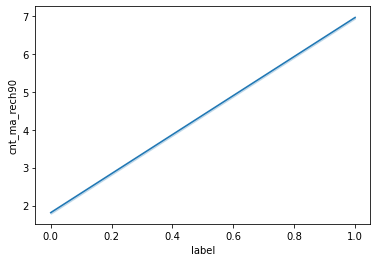

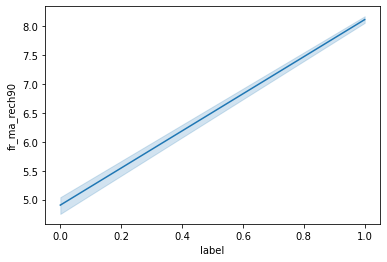

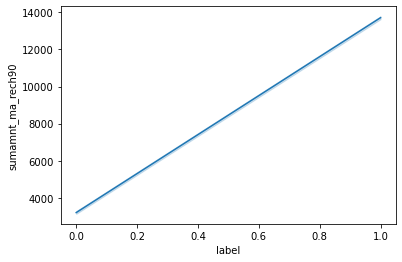

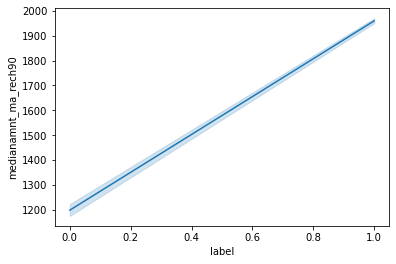

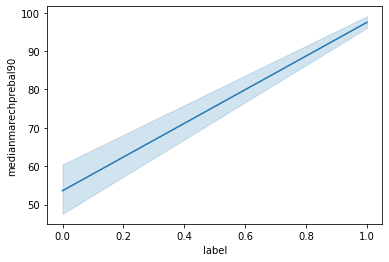

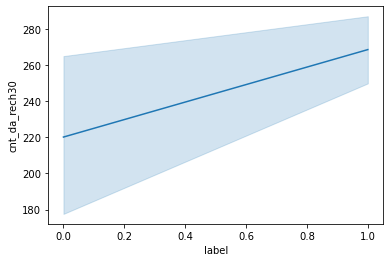

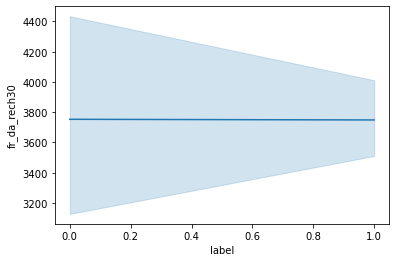

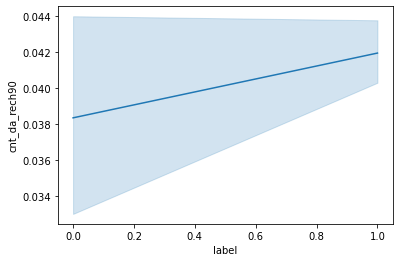

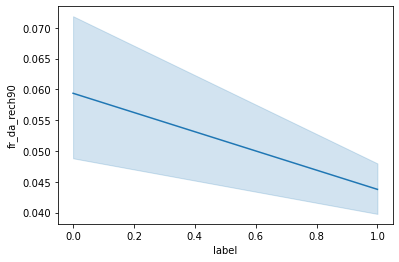

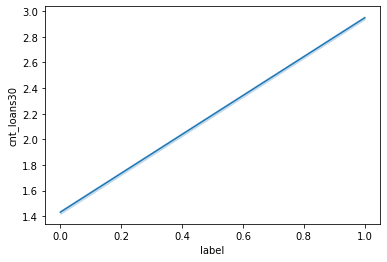

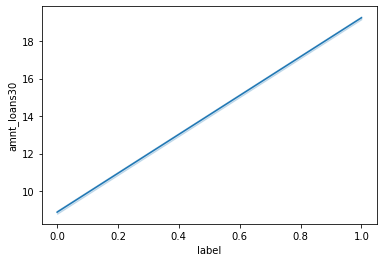

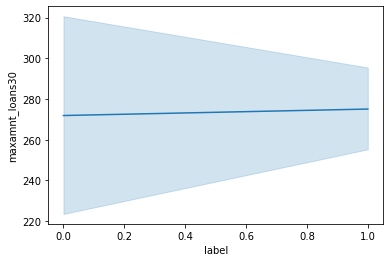

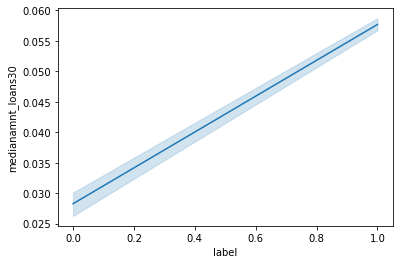

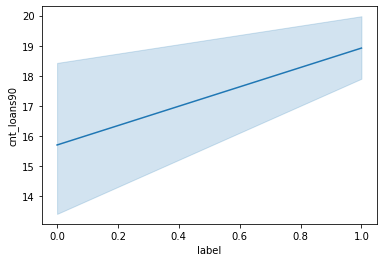

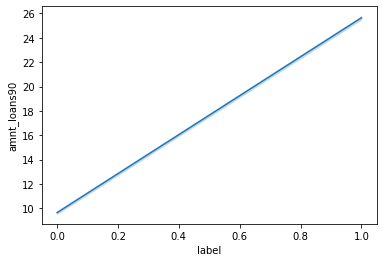

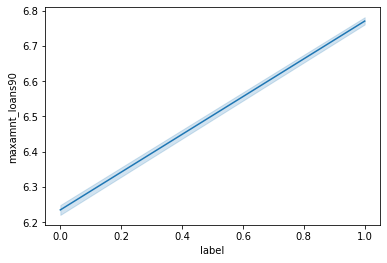

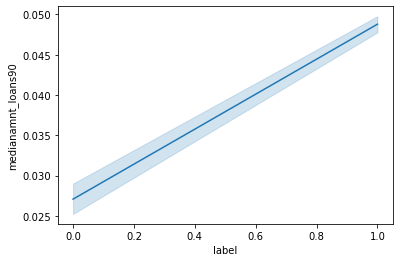

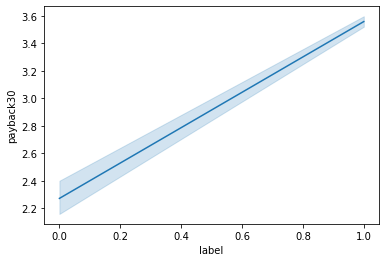

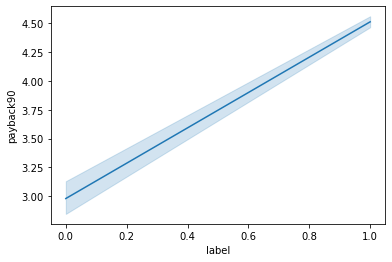

In [28]:
list=['aon',
'daily_decr30',
'daily_decr90',
'rental30',
'rental90',
'last_rech_date_ma',
'last_rech_date_da',
'last_rech_amt_ma',
'cnt_ma_rech30',
'fr_ma_rech30',
'sumamnt_ma_rech30',
'medianamnt_ma_rech30',
'medianmarechprebal30',
'cnt_ma_rech90',
'fr_ma_rech90',
'sumamnt_ma_rech90',
'medianamnt_ma_rech90',
'medianmarechprebal90',    
'cnt_da_rech30',           
'fr_da_rech30',            
'cnt_da_rech90',
'fr_da_rech90',  
'cnt_loans30',             
'amnt_loans30',            
'maxamnt_loans30',         
'medianamnt_loans30',      
'cnt_loans90',             
'amnt_loans90',            
'maxamnt_loans90',         
'medianamnt_loans90',      
'payback30',               
'payback90']

for i in list:
    sns.lineplot(x='label',y=i,data=df)
    plt.show()

# Encoding:

In [23]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [24]:
df2 = lab_enc.fit_transform(df['pcircle'])
pd.Series(df2)
df['pcircle']=df2

In [25]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,0,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,0,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,0,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,0,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,0,22,6,2016


# Check Outliers using boxplot

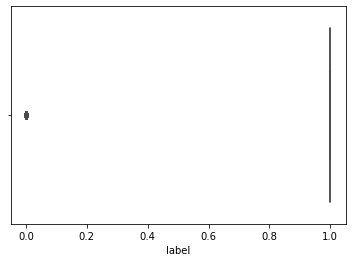

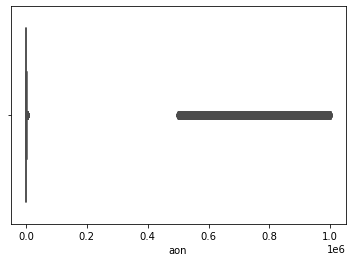

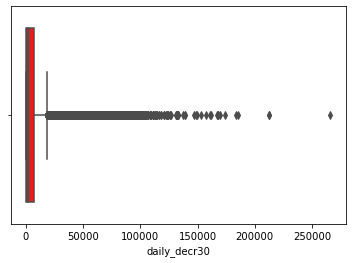

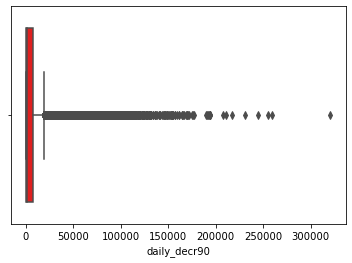

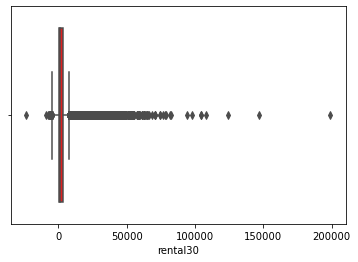

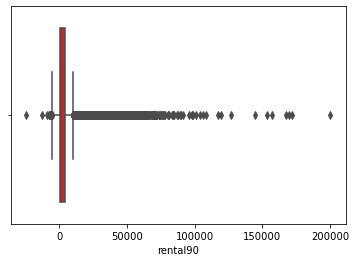

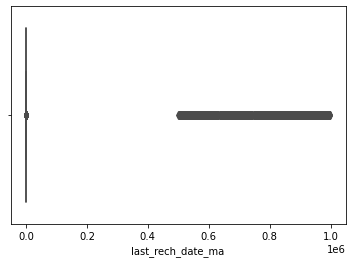

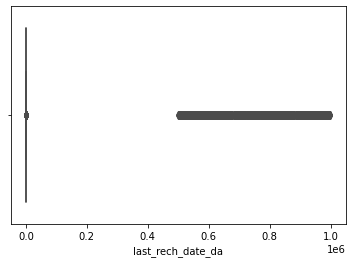

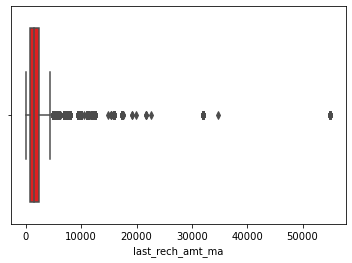

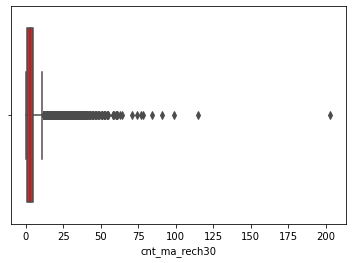

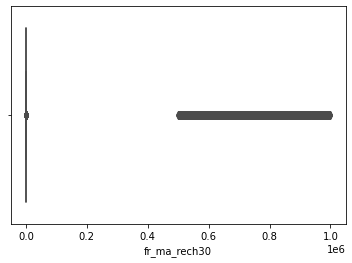

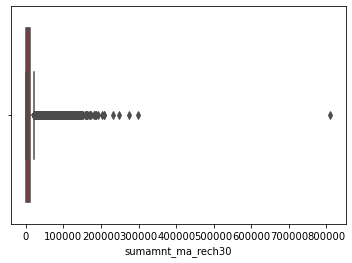

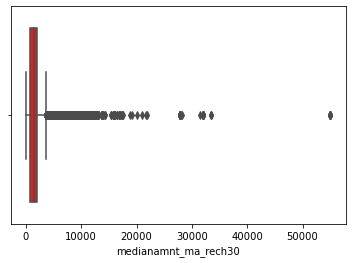

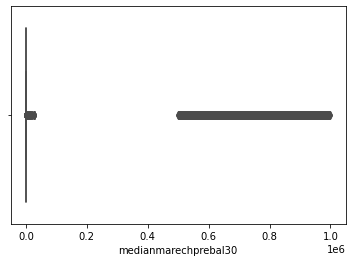

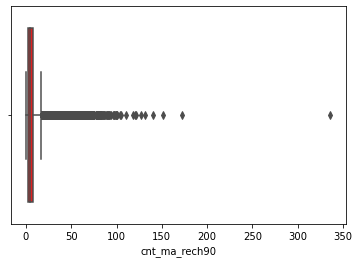

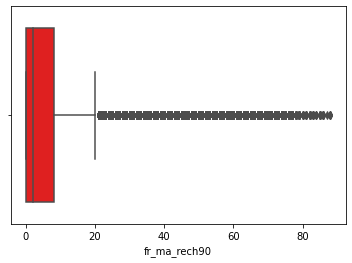

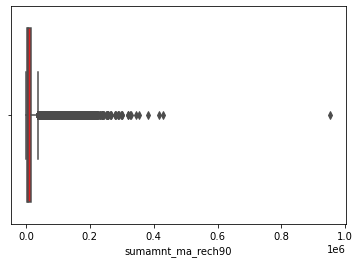

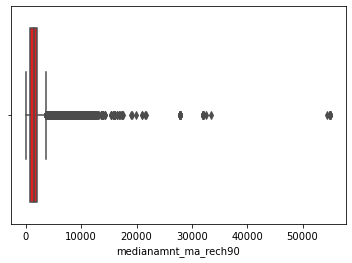

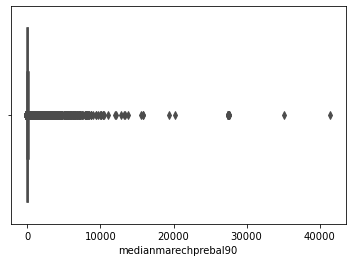

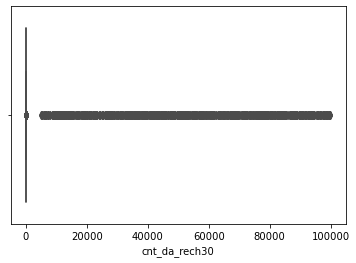

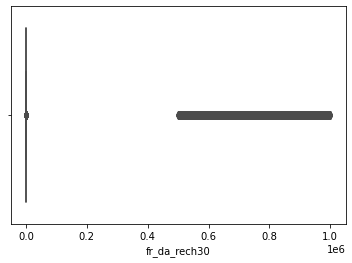

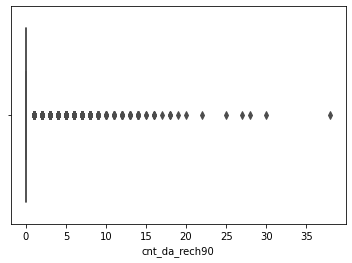

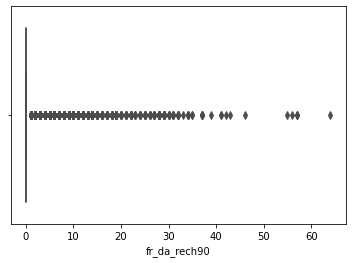

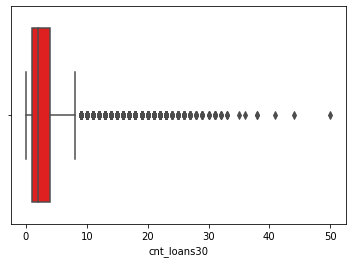

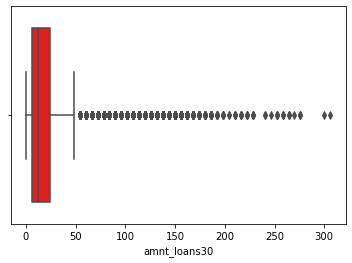

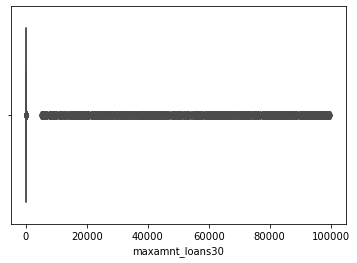

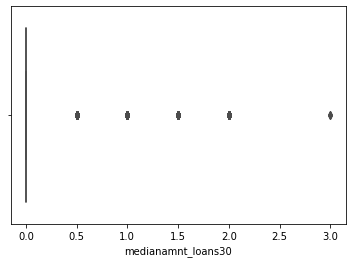

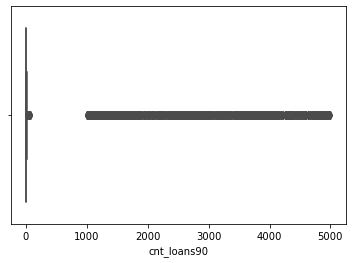

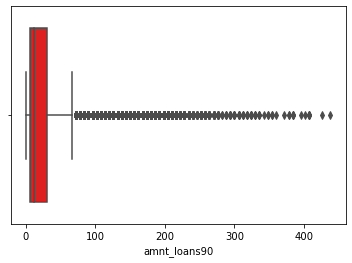

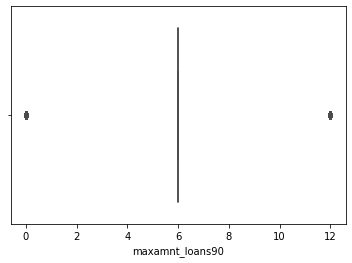

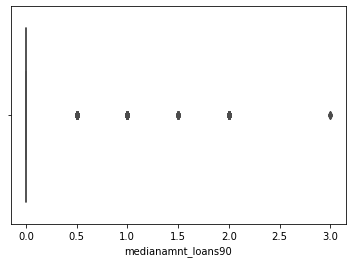

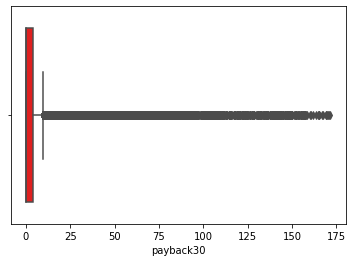

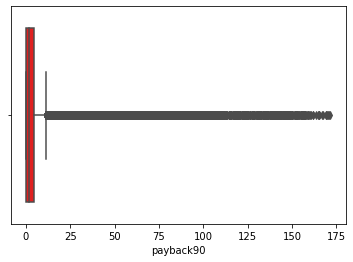

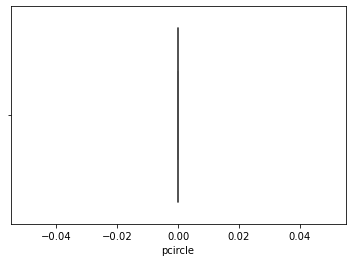

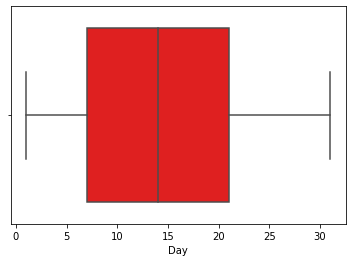

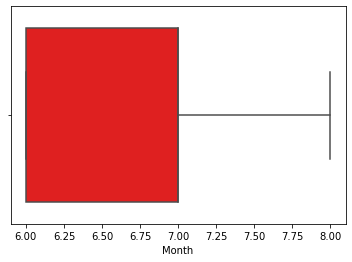

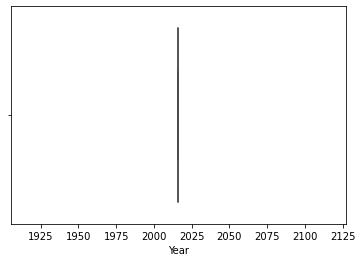

In [26]:
#Checking the Skewness
for col in df.columns:
    sns.boxplot(df[col],color='r')
    plt.show()

# Removing Outliers:

# Zscore method:

In [27]:
outlier_feat=['daily_decr30', 'daily_decr90','medianamnt_ma_rech90','medianmarechprebal90','amnt_loans30','amnt_loans90']
from scipy.stats import zscore
z_score=zscore(df[outlier_feat])
abs_z_score=np.abs(z_score)

In [28]:
remove_outlier=(abs_z_score<3).all(axis=1)
df_new=df[remove_outlier]
print('Pervious Shape:', df.shape)
print('After removing the new shape : ',df_new.shape)

Pervious Shape: (209593, 37)
After removing the new shape :  (196637, 37)


After removing the outliers, we now have 196637 rows.

In [29]:
print('Data Loss =', ((209593-196637)/209593)*100 , '%')

Data Loss = 6.181504153287562 %


# Checking and removing Skewness:

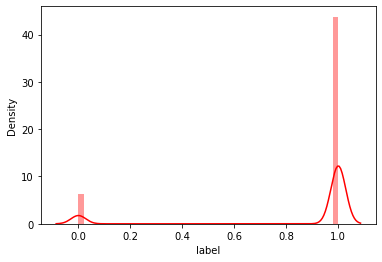

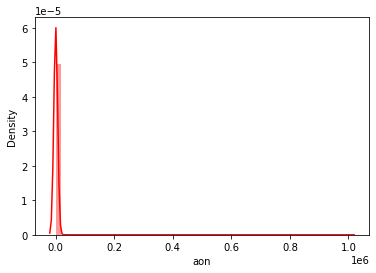

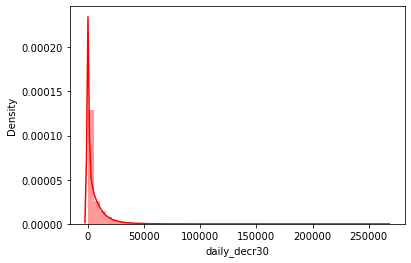

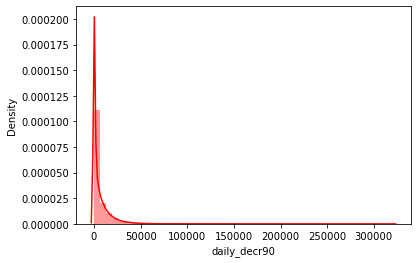

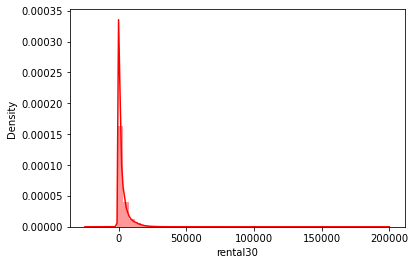

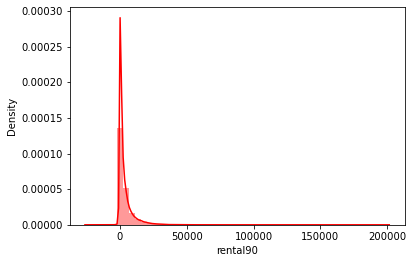

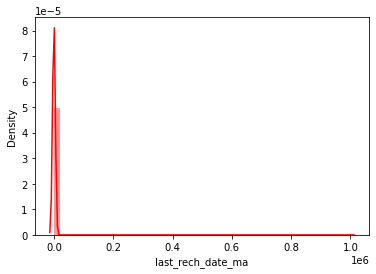

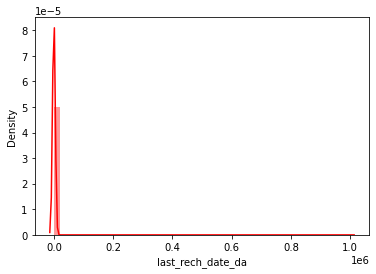

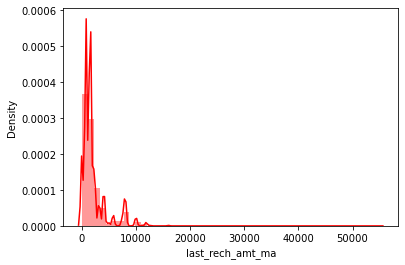

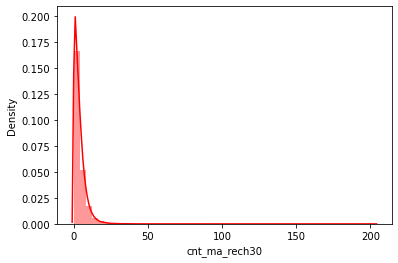

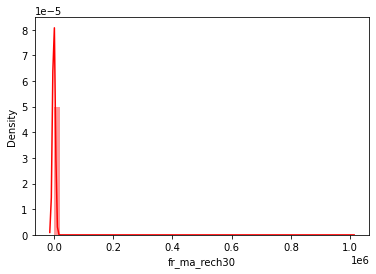

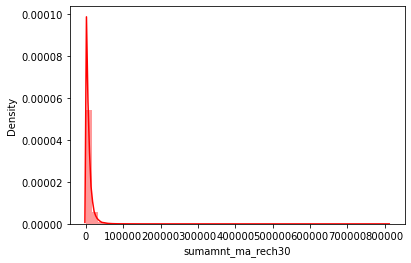

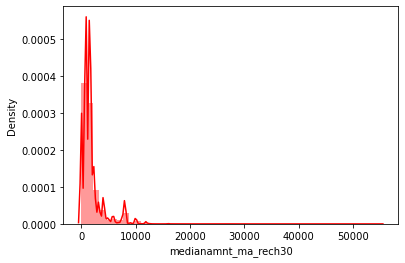

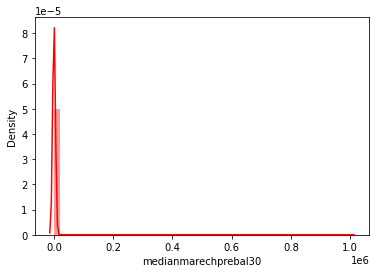

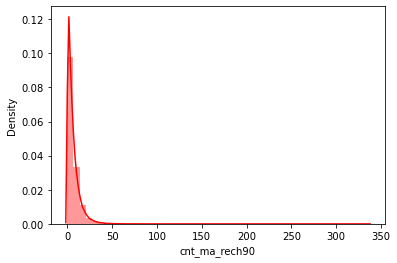

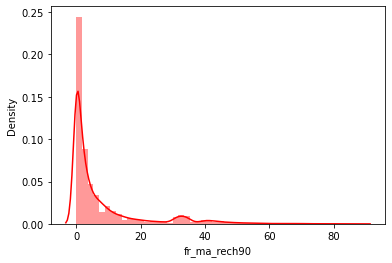

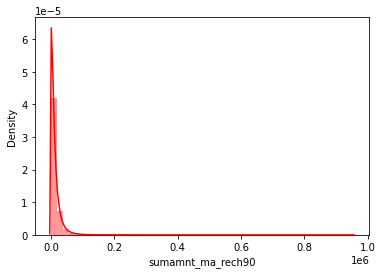

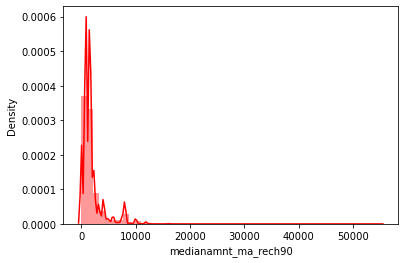

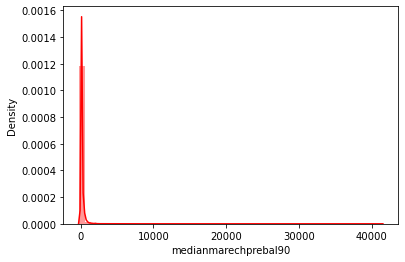

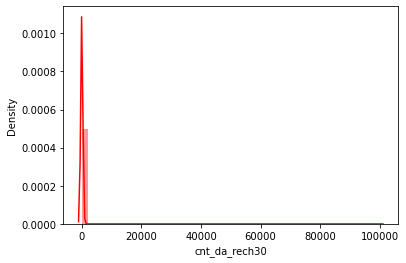

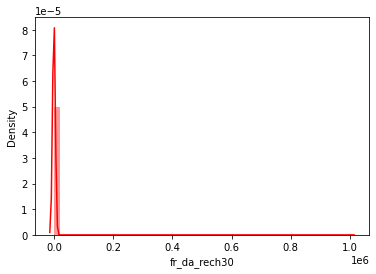

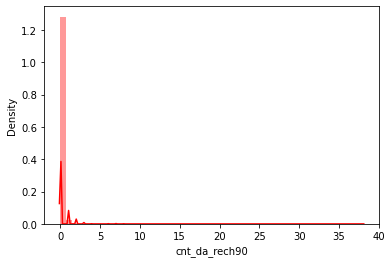

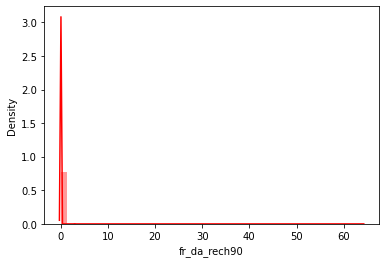

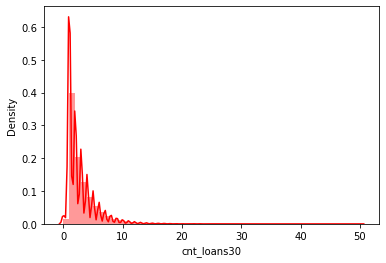

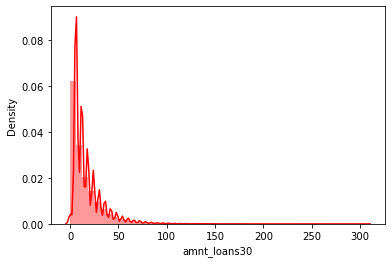

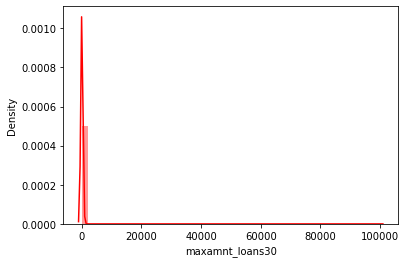

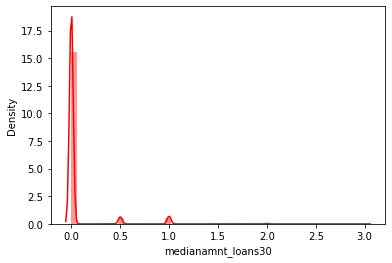

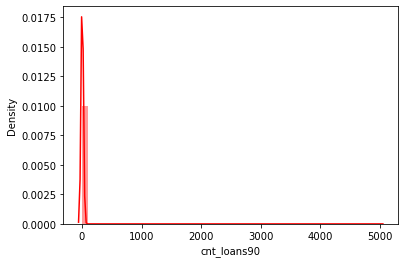

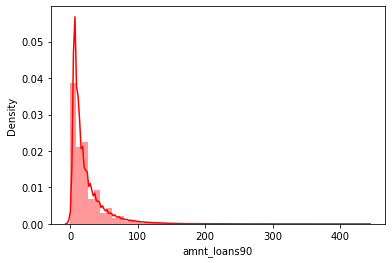

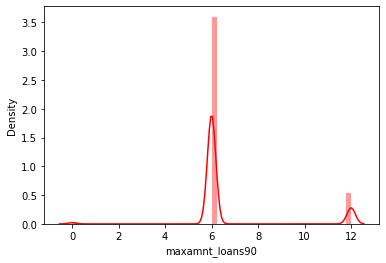

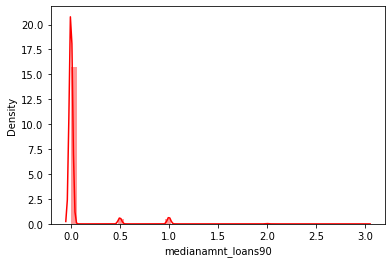

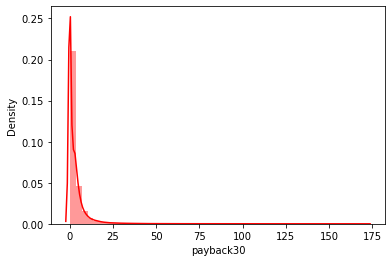

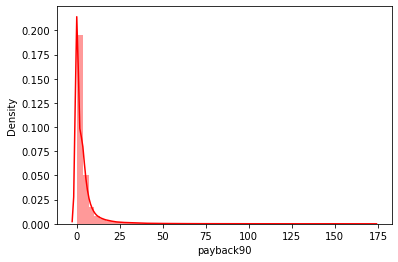

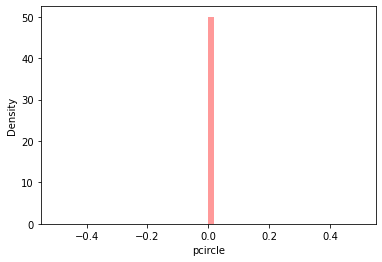

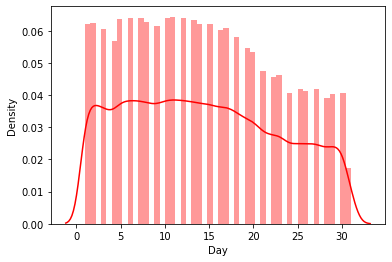

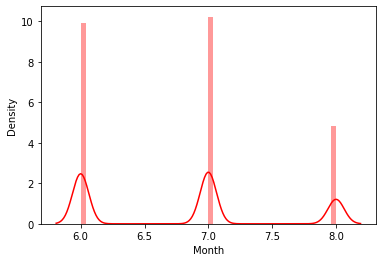

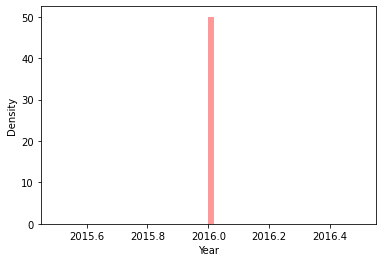

In [113]:
#Checking the Skewness
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [30]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [31]:
from sklearn.preprocessing import power_transform

df[['medianmarechprebal30','last_rech_date_ma','last_rech_date_da','last_rech_date_da','aon','fr_ma_rech30']]=power_transform(df[['medianmarechprebal30','last_rech_date_ma','last_rech_date_da','last_rech_date_da','aon','fr_ma_rech30']])
   

In [32]:
# Drop unwanted column
df = df.drop(['Year'],axis=1)
df = df.drop(['Month'],axis=1)
df = df.drop(['Day'],axis=1)
df = df.drop(['pcircle'],axis=1)

# Correlation using HEAT map:

In [33]:
# Checking the correlation between features and the target
cor = df.corr()
cor


,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.031059,0.168298,0.166150,0.058085,0.075521,-0.021145,0.005148,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,0.031059,1.000000,0.038201,0.036621,0.032971,0.034296,0.004506,0.000850,0.043888,0.028098,...,0.037832,0.037905,-0.003696,-0.002248,0.000826,0.042515,0.020955,-0.007295,0.019293,0.026035
daily_decr30,0.168298,0.038201,1.000000,0.977704,0.442066,0.458977,0.030848,0.012523,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.036621,0.977704,1.000000,0.434685,0.471730,0.029938,0.011449,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,0.032971,0.442066,0.434685,1.000000,0.955237,0.031032,0.009448,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,0.034296,0.458977,0.471730,0.955237,1.000000,0.031689,0.008932,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.021145,0.004506,0.030848,0.029938,0.031032,0.031689,1.000000,0.016242,0.020869,0.005913,...,0.012616,0.014507,-0.002969,0.003478,0.000334,0.019606,0.016913,0.001133,0.010250,0.017275
last_rech_date_da,0.005148,0.000850,0.012523,0.011449,0.009448,0.008932,0.016242,1.000000,0.000945,0.005890,...,0.003558,0.005775,0.000432,0.001477,0.000174,0.005641,0.011104,-0.000320,0.003312,0.010319
last_rech_amt_ma,0.131804,0.043888,0.275837,0.264131,0.127271,0.121416,0.020869,0.000945,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,0.028098,0.451385,0.426707,0.233343,0.230260,0.005913,0.005890,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0, 0.5, 'label'),
  Text(0, 1.5, 'aon'),
  Text(0, 2.5, 'daily_decr30'),
  Text(0, 3.5, 'daily_decr90'),
  Text(0, 4.5, 'rental30'),
  Text(0, 5.5, 'rental90'),
  Text(0, 6.5, 'last_rech_date_ma'),
  Text(0, 7.5, 'last_rech_date_da'),
  Text(0, 8.5, 'last_rech_amt_ma'),
  Text(0, 9.5, 'cnt_ma_rech30'),
  Text(0, 10.5, 'fr_ma_rech30'),
  Text(0, 11.5, 'sumamnt_ma_rech30'),
  Text(0, 12.5, 'medianamnt_ma_rech30'),
  Text(0, 13.5, 'medianmarechprebal30'),
  Text(0, 14.5, 'cnt_ma_rech90'),
  Text(0, 15.5, 'fr_ma_rech90'),
  Text(0, 16.5, 'sumamnt_ma_rech90'),
  Text(0, 17.5, 'medianamnt_ma_rech90'),
  Text(0, 18.5, 'medianmarechprebal90'),
  Text(0, 19.5, 'cnt_da_rech30'),
  Text(0, 20.5, 'fr_da_rech30'),
  Text(0, 21.5, 'cnt_da_rech90'),
  Text(0, 22.5, 'fr_da_r

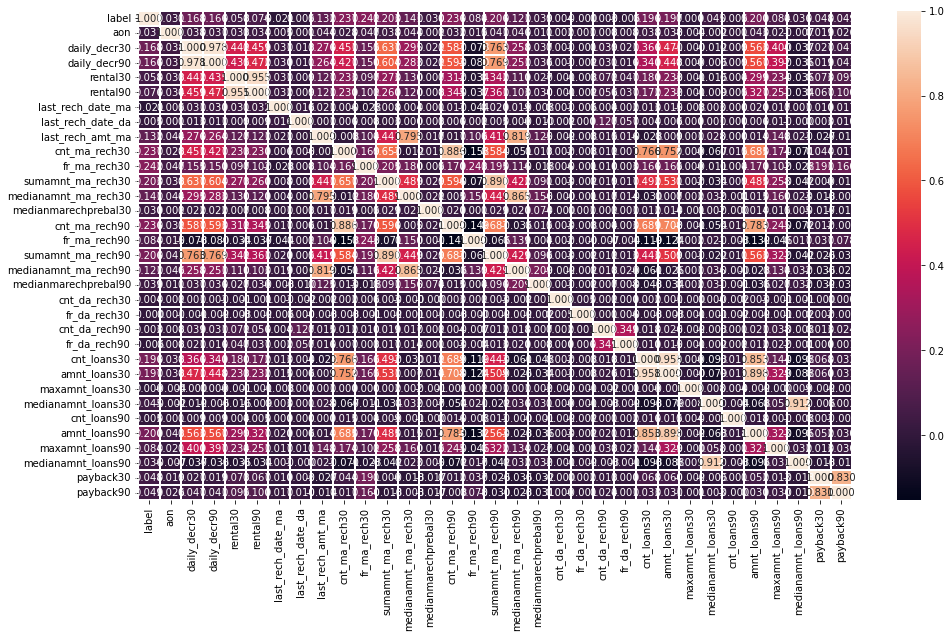

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [35]:
cor['label'].sort_values(ascending=False)

label                   1.000000
fr_ma_rech30            0.241959
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
aon                     0.031059
medianmarechprebal30    0.030221
last_rech_date_da       0.005148
cnt_loans90             0.004733
cnt_da_rech30           0.003827
cnt_da_rech90           0.002999
maxamnt_loans30         0.000248
fr_da_rech

# Visualizing the correlation between label and features using bar plot

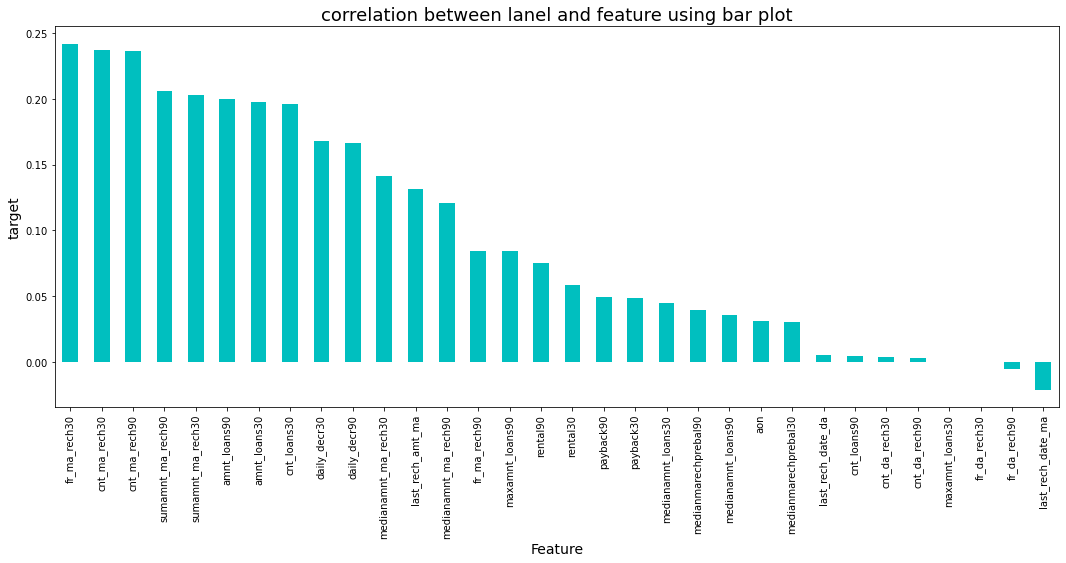

In [36]:
plt.figure(figsize=(18,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

# Dividing data in feature and Label

In [37]:
x=df.drop(columns='label')#Feature
y=df.label#Target

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)

In [40]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.17711186, -0.25229941, -0.27634619, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [ 0.03645291,  0.73103667,  0.5533797 , ..., -0.22959366,
        -0.38562959, -0.41923266],
       [-0.03465905, -0.43201111, -0.42903256, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [ 0.13457681,  0.70079045,  0.53319431, ..., -0.22959366,
         0.06820893, -0.04735622],
       [ 0.30910144,  0.77075515,  0.59455827, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [ 0.27706283, -0.09674426, -0.14174607, ..., -0.22959366,
        -0.38562959, -0.41923266]])

# Now use VIF for checking multicollinearity problem
VIF - > Variance Inflation Factor

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,aon,1.006505
1,daily_decr30,29.106991
2,daily_decr90,31.999107
3,rental30,13.142587
4,rental90,13.813196
5,last_rech_date_ma,1.006197
6,last_rech_date_da,1.017277
7,last_rech_amt_ma,3.440456
8,cnt_ma_rech30,14.993557
9,fr_ma_rech30,1.211726


In [46]:
x.drop('daily_decr30',axis=1,inplace=True)
x.drop('daily_decr90',axis=1,inplace=True)
x.drop('amnt_loans30',axis=1,inplace=True)

In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,aon,1.006338
1,rental30,12.288454
2,rental90,12.957070
3,last_rech_date_ma,1.005927
4,last_rech_date_da,1.017231
5,last_rech_amt_ma,3.439209
6,cnt_ma_rech30,14.656748
7,fr_ma_rech30,1.206887
8,sumamnt_ma_rech30,11.780871
9,medianamnt_ma_rech30,5.119747


In [48]:
x.drop('cnt_ma_rech90',axis=1,inplace=True)

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,aon,1.006338
1,rental30,12.201663
2,rental90,12.839508
3,last_rech_date_ma,1.005760
4,last_rech_date_da,1.017231
5,last_rech_amt_ma,3.423595
6,cnt_ma_rech30,3.881211
7,fr_ma_rech30,1.206159
8,sumamnt_ma_rech30,8.318629
9,medianamnt_ma_rech30,5.047155


In [50]:
x.drop('rental30',axis=1,inplace=True)
x.drop('rental90',axis=1,inplace=True)

In [51]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x)

VIF= pd.DataFrame()
VIF['features']=x.columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
VIF

,features,vif
0,aon,1.006131
1,last_rech_date_ma,1.005298
2,last_rech_date_da,1.017210
3,last_rech_amt_ma,3.420251
4,cnt_ma_rech30,3.860791
5,fr_ma_rech30,1.205181
6,sumamnt_ma_rech30,8.153832
7,medianamnt_ma_rech30,5.045433
8,medianmarechprebal30,1.006576
9,fr_ma_rech90,1.146001


# Dividing data in feature and Label

In [52]:
x=df.drop(columns='label')#Feature
y=df.label#Target

# TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# MODEL BUILDING

In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [55]:
# list model name and accuracies
models = []
accuracies = []

In [56]:
def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(10,9)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

# 1. Logistic Regression

Accuracy =  0.8760297719393111 

              precision    recall  f1-score   support

           0       0.52      0.16      0.25      7902
           1       0.89      0.98      0.93     54976

    accuracy                           0.88     62878
   macro avg       0.71      0.57      0.59     62878
weighted avg       0.84      0.88      0.85     62878

Confusion Matrix: 
 [[ 1298  6604]
 [ 1191 53785]]


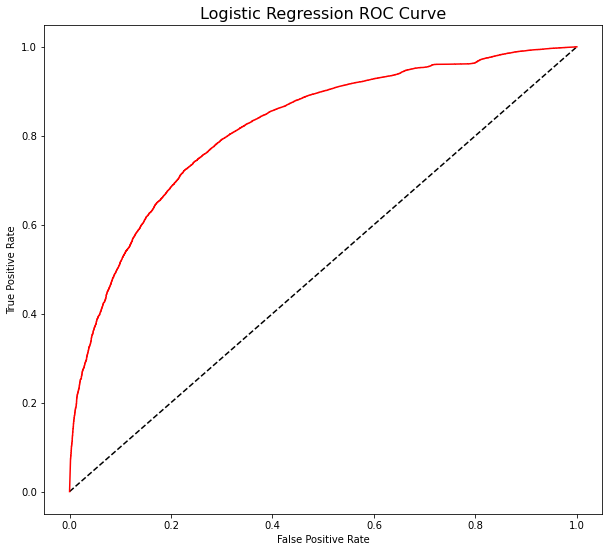

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)


# 2. Decision Tree

Accuracy =  0.8645313146092433 

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      7902
           1       0.93      0.92      0.92     54976

    accuracy                           0.86     62878
   macro avg       0.70      0.71      0.70     62878
weighted avg       0.87      0.86      0.87     62878

Confusion Matrix: 
 [[ 3914  3988]
 [ 4530 50446]]


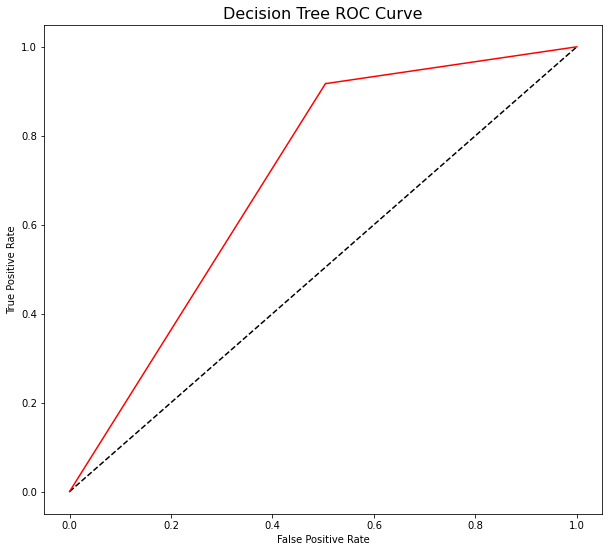

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Decision Tree'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 4. XG Boost

Accuracy =  0.9145329049906168 

              precision    recall  f1-score   support

           0       0.77      0.46      0.57      7902
           1       0.93      0.98      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.85      0.72      0.76     62878
weighted avg       0.91      0.91      0.90     62878

Confusion Matrix: 
 [[ 3604  4298]
 [ 1076 53900]]


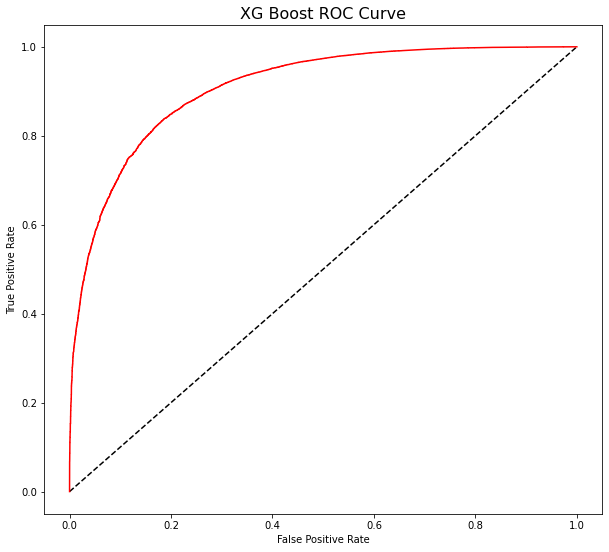

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'XG Boost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 5. Adaboost

Accuracy =  0.902557333248513 

              precision    recall  f1-score   support

           0       0.82      0.29      0.43      7902
           1       0.91      0.99      0.95     54976

    accuracy                           0.90     62878
   macro avg       0.86      0.64      0.69     62878
weighted avg       0.90      0.90      0.88     62878

Confusion Matrix: 
 [[ 2275  5627]
 [  500 54476]]


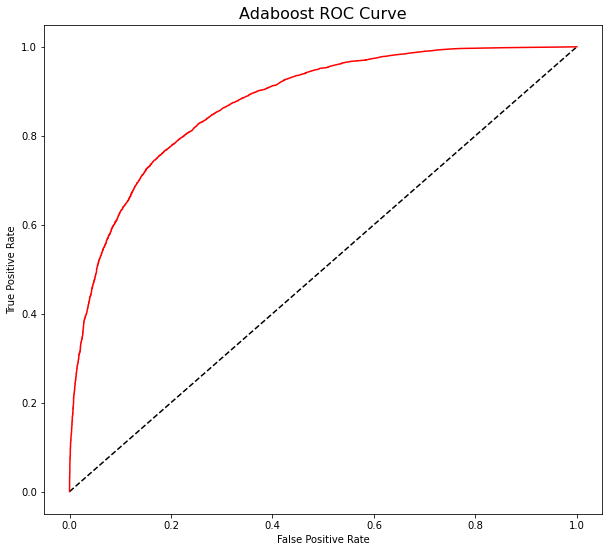

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
model = adb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Adaboost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 6. Random Forest

Accuracy =  0.9119882947930914 

              precision    recall  f1-score   support

           0       0.76      0.44      0.56      7902
           1       0.92      0.98      0.95     54976

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878

Confusion Matrix: 
 [[ 3451  4451]
 [ 1083 53893]]


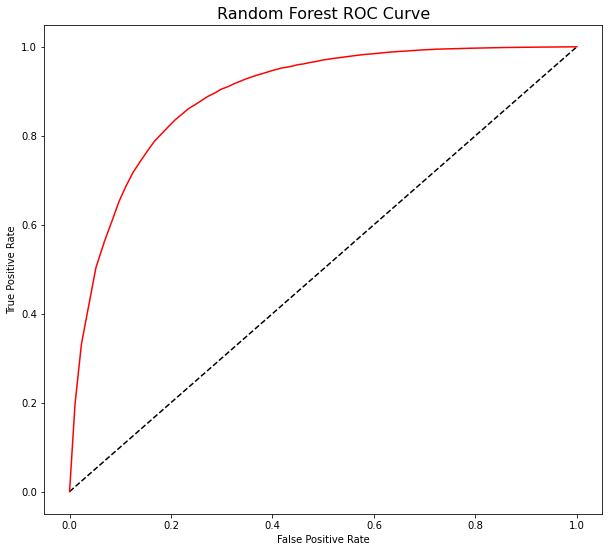

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# Do Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10)}

In [64]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [66]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [67]:
cnn=RandomForestClassifier(criterion='entropy',max_depth=11,max_leaf_nodes=9,min_samples_split= 3)

In [68]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=9,
                       min_samples_split=3)

In [69]:
cnn.score(x_train,y_train)

0.9013256994853969

In [70]:
cnn.score(x_test,y_test)

0.9010305671299977

# AUC ROC curve

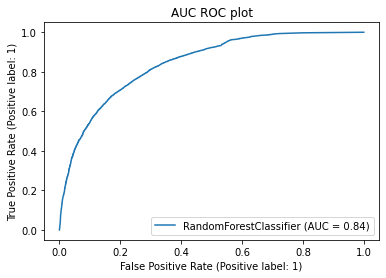

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cnn, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

# Lets Save Our Model

In [72]:
import pickle
filename='Micro_Credit_Defaulter.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [73]:
loaded_model=pickle.load(open('Micro_Credit_Defaulter','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.19882947930914
